<H1>Pathfinding using the A* Algorithm</H1>

<H2>Basic Idea</H2>

Given a start node and end node the goal is to find the shortest path.

If I am at a given node $n$, I calculate two functions, $g(n)$, and $h(n)$

$g(n)$ is the distance to the start node, this is calculated iteratively as we move along the grid.

$h(n)$ is the distance from the end node, this is calculated using the "manhattan distance."

Then, the idea of the <b>A*</b> algorithm is to take the step that minimises $f = g + h$

This process is repeated until we reach the endpoint.

Then the program traces back its steps to find the path it took to reach the end.

In [1]:
import random
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import time

<H3>Initialising my variables</H3>

In [2]:
n = 50 # Number of rows
m = 50 # Number of cols
start = (0,0) # start point
end = (m-1,n-1) # endpoint (goal)

endx,endy = end
current = start # initialising current node to start
checked = np.zeros((n,m)) # creating an array of checked nodes.



#Inititalising my g values to n*m +1, which is longer than any possible path.
def init_g(n = 50, m = 50, start = (0,0)):
    gs = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            gs[i,j] = m*n +1
    xstart, ystart = start
    gs[xstart,ystart] = 0
    
    return gs

#Using the grid distance as heuristic.
def griddist(current,end = end):
    return abs(end[0] - current[0]) + abs(end[1] - current[1])


def eucdist(current, end = end):
    return np.sqrt((end[0] - current[0])**2 + (end[1] - current[1])**2)


#creating my h array using the distance function above.
def init_h(n = n,m = m, end = end):
    h = np.zeros((n,m))

    for i in range(n):
        for j in range(m):
            h[i,j] = griddist([i,j],end)
    return h

<h3>Using RNG to make random matrices to play with</h3>

In [3]:
def createmaze(n = n,m = m,start=start,end=end):
    maze = np.zeros((n,m))
    
    for i in range(0,n):
        for j in range(0,m):
            rand = np.random.rand()
            if rand < 0.8:
                maze[i,j] = 1
            else:
                maze[i,j] = 0

    maze[start] = 1
    maze [end] = 1
    
    return maze

<h3>Making arrays to store $f(n)$, $g(n)$, and $h(n)$</h3>

In [4]:
#find all possible neighbours of a given cell.
def neighbours(maze,current):
    n, m = maze.shape
    x,y = current
    neighbours = []
    
    if x < n-1 and maze[x + 1, y] == 1:
        neighbours.append([x+1,y])
        
    if y < m-1 and maze[x, y + 1] == 1:
        neighbours.append([x,y +1 ])
        
    if x > 0 and maze[x - 1 , y] == 1:
        neighbours.append([x-1,y])
    
    if y > 0 and maze[x,y-1] == 1:
        neighbours.append([x,y-1])
        
    return neighbours


#updates g after taking a step
def updateg(g,maze, current):
    cx, cy = current
    for x,y in neighbours(maze,current):
        if g[cx,cy] + 1 < g[x,y]:
            g[x,y] = g[cx,cy] + 1
            #global came_from
            came_from[(x,y)] = (cx,cy)
    return g

#updates f after taking a step
def updatef(g,h,maze,current,mu = 0.5):
    g = updateg(g,maze,current)
    return mu*g + (1-mu)*h
    
#determines the next node I should go to.
def least_cost(f, g, checked):
    n, m = f.shape

    # Mask valid cells (unchecked and reachable)
    mask = (checked == 0) & (g < n*m + 1)

    if not np.any(mask):
        return -1  # no valid nodes left

    # Among valid cells, find the one with the smallest f
    valid_f = np.where(mask, f, np.inf)
    x, y = np.unravel_index(np.argmin(valid_f), valid_f.shape)
    return [x, y]   

<h3>Main loop</h3>

In [ ]:

mu = 0.5
came_from = {} 
gs = init_g()
hs = init_h()


fs = mu*gs + (1-mu)*hs
frames = []
maze = createmaze()
for _ in range(n*m):
    if checked[endx,endy] == 0:
        cx, cy = current
        checked[cx,cy] = 1
        frame = maze + checked
        frames.append(frame)
        fs = updatef(gs,hs,maze,current,mu)
        next_node = least_cost(fs,gs,checked)
        if next_node != -1:
            current = next_node

        else:
            print("There is no path")
            break




#reconstruct path
path = []
node = end
while node in came_from:
    path.append(node)
    node = came_from[node]
path.append(start)
path.reverse()

<H3> Visualisation using Matplotlib <a href =https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html>Click for details</a></H3>

In [ ]:
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap

In [ ]:
patharr = np.zeros((n,m))

for i in range(len(path)):
    x = path[i][0]
    y = path[i][1]
    patharr[x,y] = 1

endframe = maze + patharr + checked

for _ in range(50):
    frames.append(endframe)


%matplotlib notebook
fig, ax = plt.subplots()
cmap = ListedColormap(['black', 'white', 'red', 'yellow'])
mesh = ax.pcolormesh(frames[0], cmap=cmap, linewidth=0.2, vmin = 0, vmax = 3 )
ax.set_aspect('equal')
ax.invert_yaxis()
ax.set_xticks([])
ax.set_yticks([])

def update(frame):
    mesh.set_array(frame.ravel())  # update pcolormesh with the flattened array
    return [mesh]

ani = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)
ani.save("maze_animation.gif", writer='pillow')


<h3>Playing with times varying mu</h3>

Before we used $f = g + h$. This is the standard <b>A*</b> method.

Instead, if we introduce a parameter $\mu$ which changes the weighting of $g$, and $h$ in the following way:

$$
f = \mu g + (1-\mu)h, \, \mu \in [0,1]
$$

We can play around with the different weights and look at the limitations of <b>A*</b>.

In the case $\mu = 0$ we get a purely depth first search, this is quick but doesn't always find the shortest path.

In the case $\mu = 1$ we get a purely breadth first search, this is a lot slower but guarentees finding the shortest path.

Ideally, we would like to find the smallest value of $\mu$ that guarentees finding the shortest path.


There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no pa

There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no pa

/tmp/ipykernel_11431/2825417894.py:62: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax1 = plt.subplots()


There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no pa

There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no pa

There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no pa

There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no pa

There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no pa

There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no pa

There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no path
There is no pa

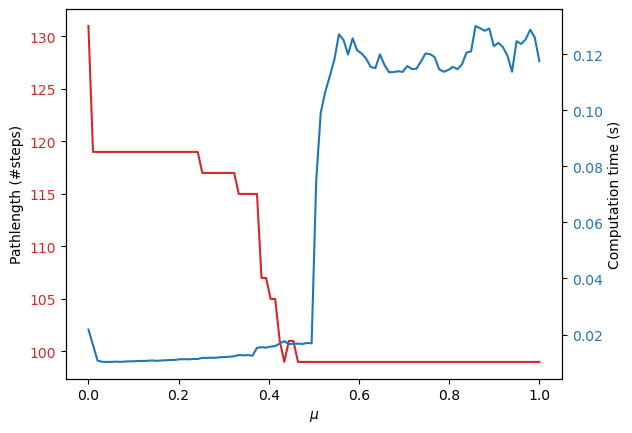

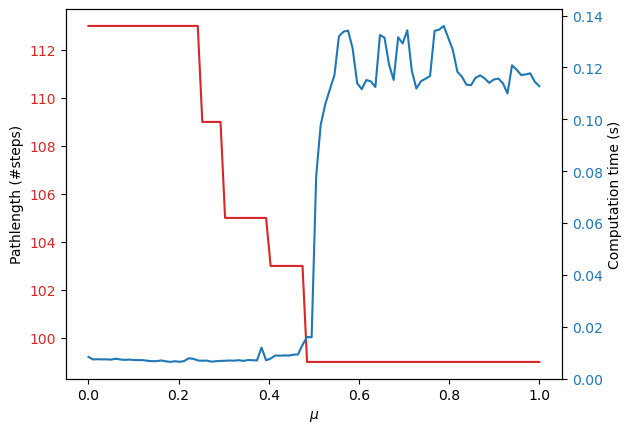

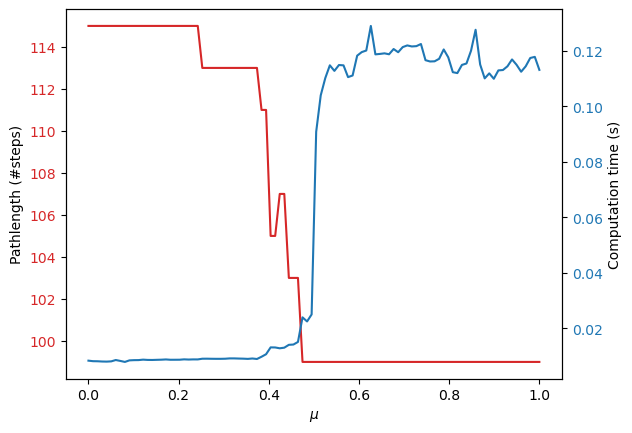

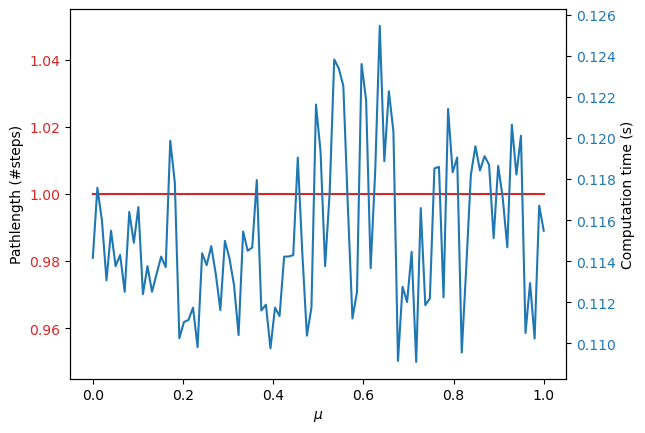

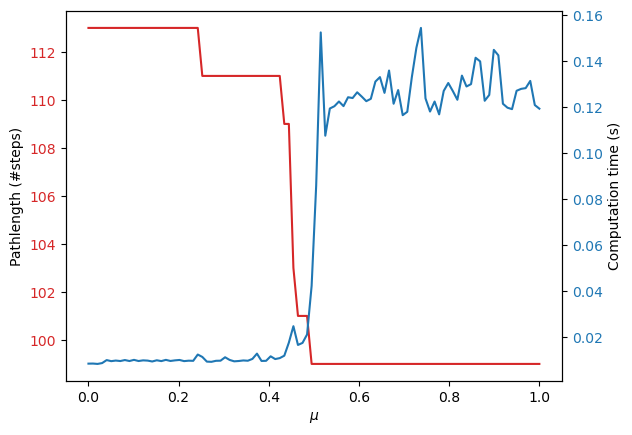

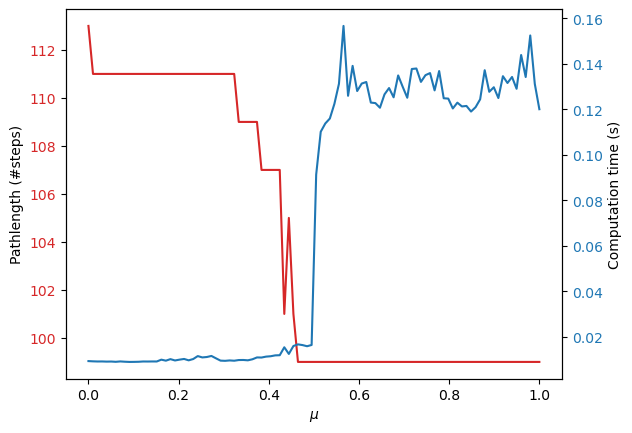

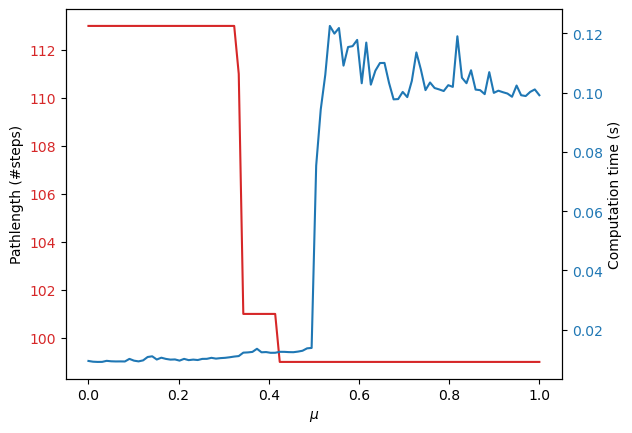

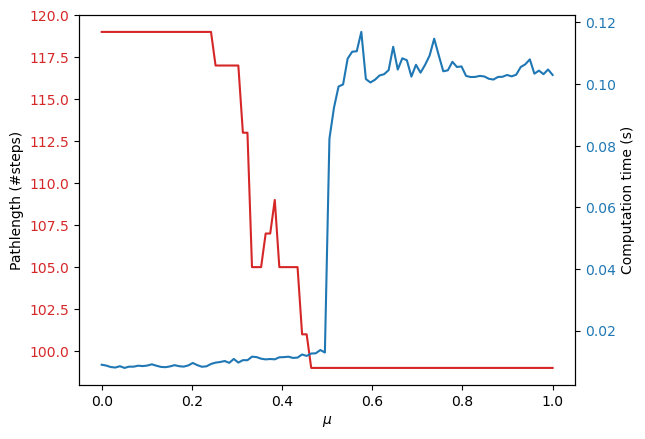

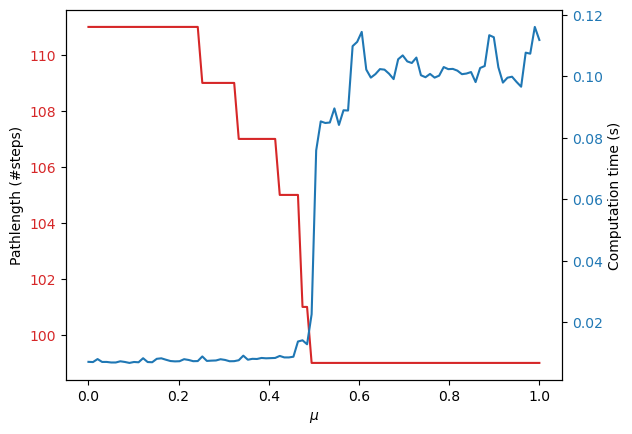

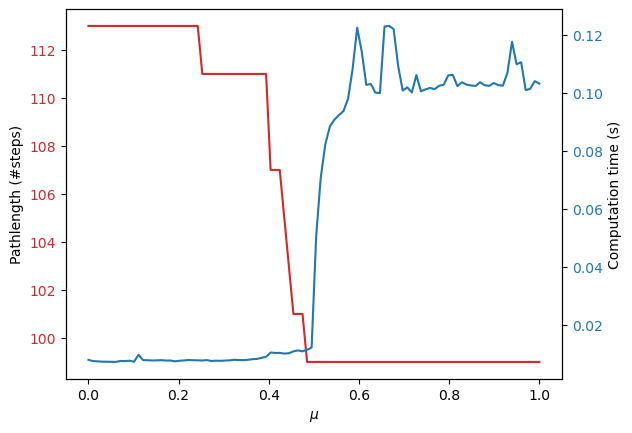

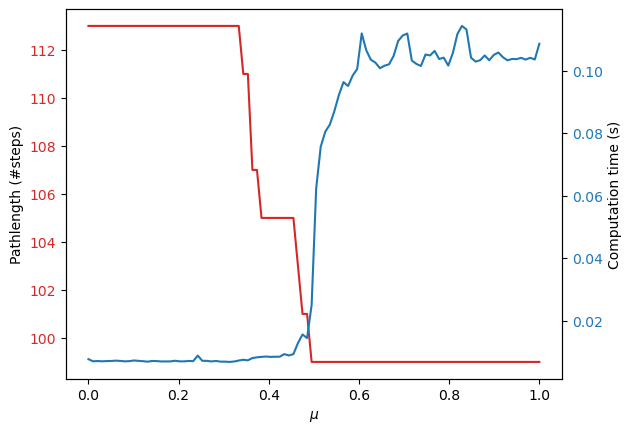

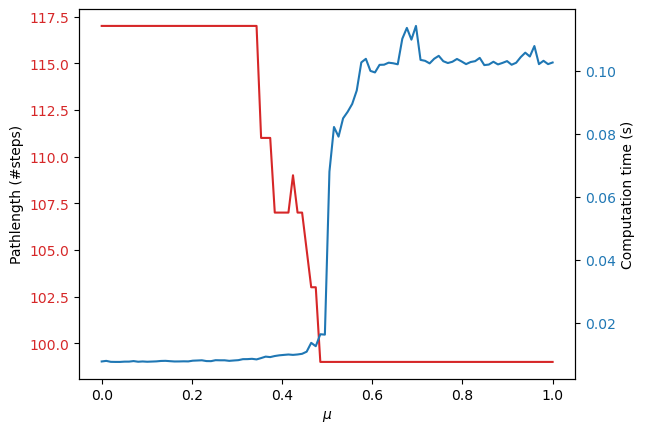

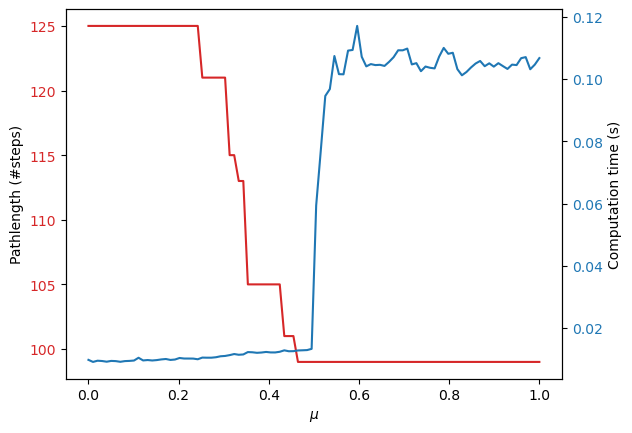

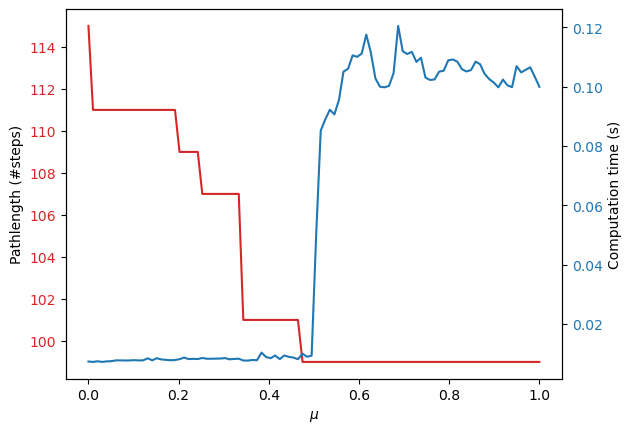

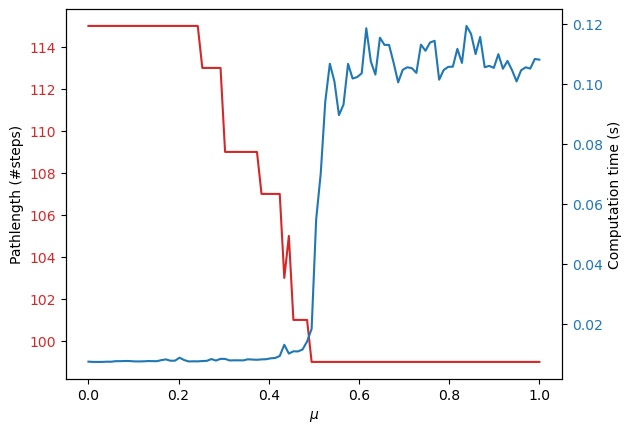

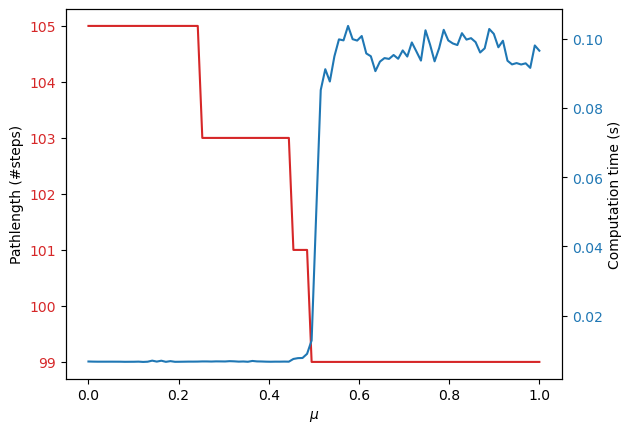

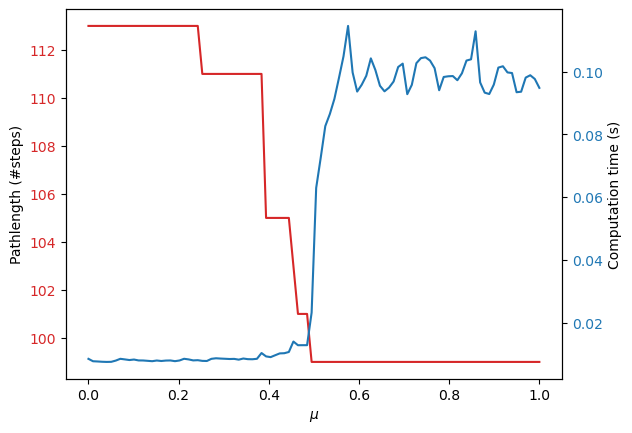

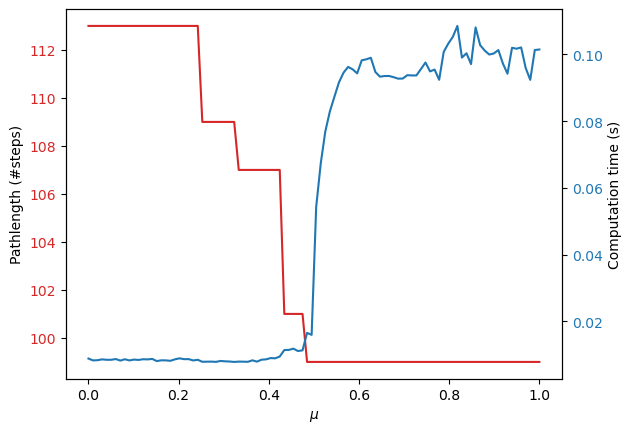

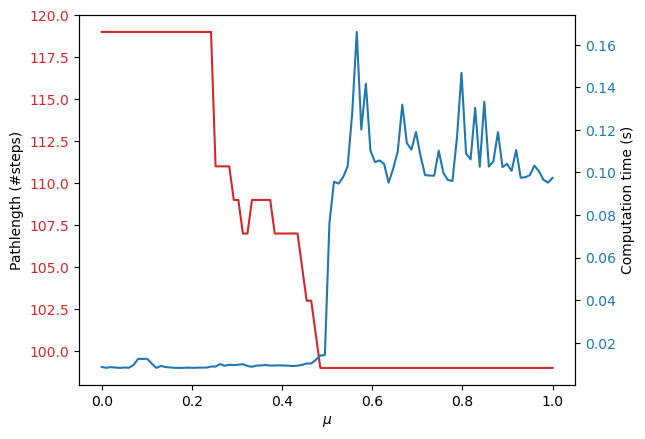

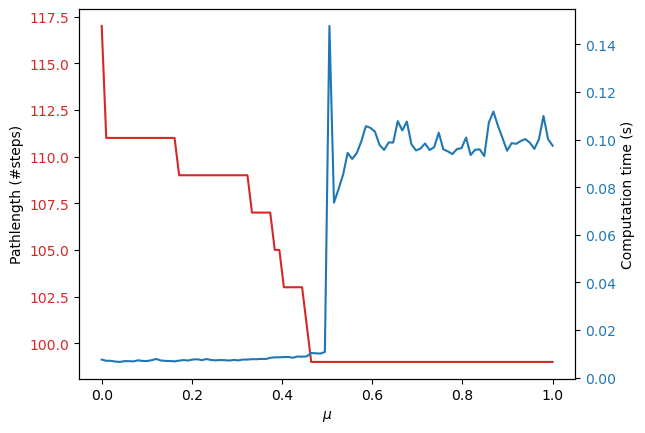

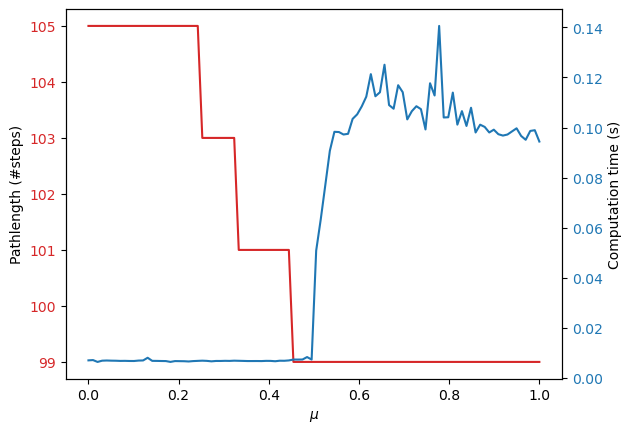

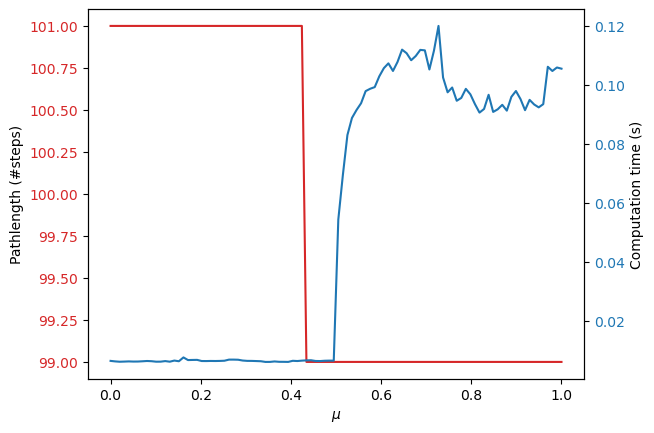

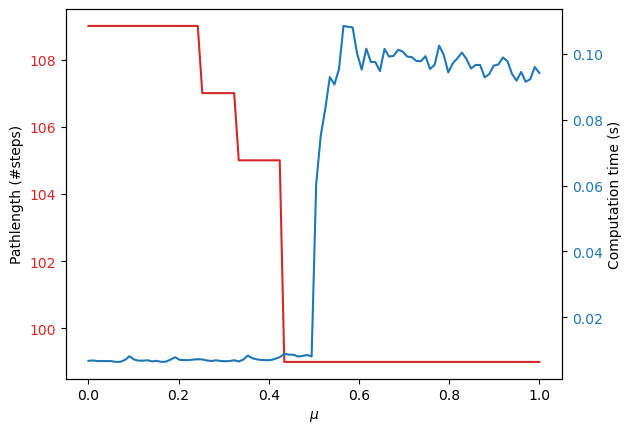

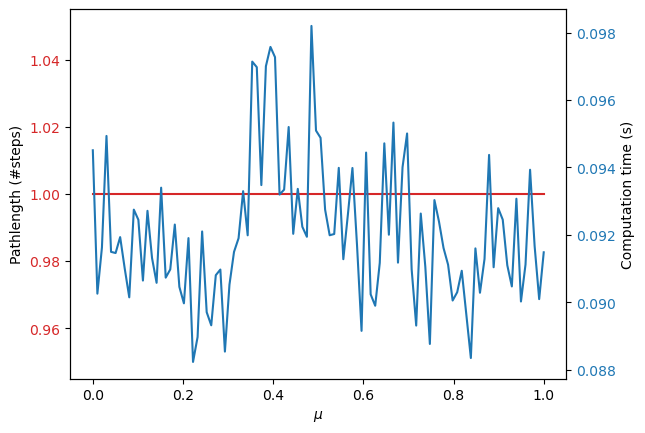

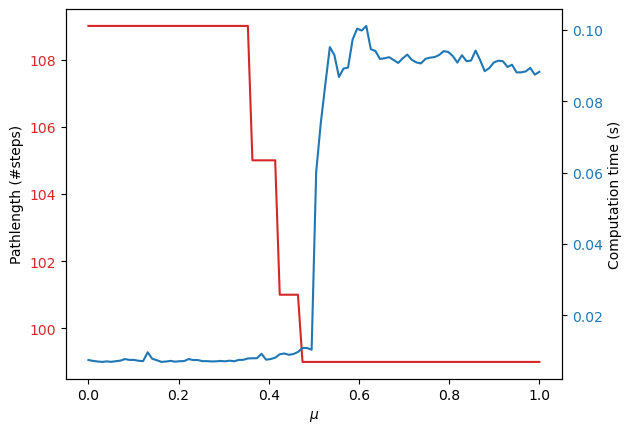

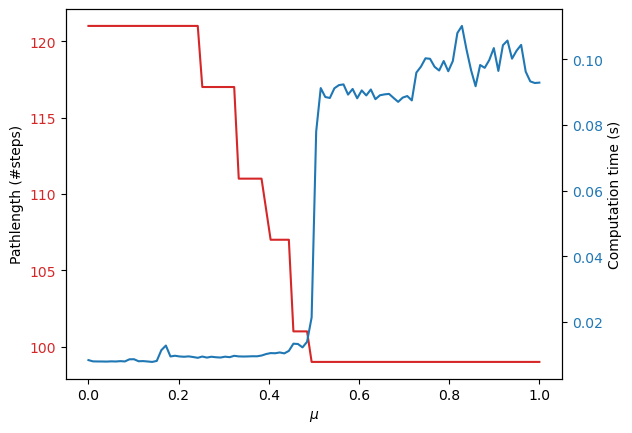

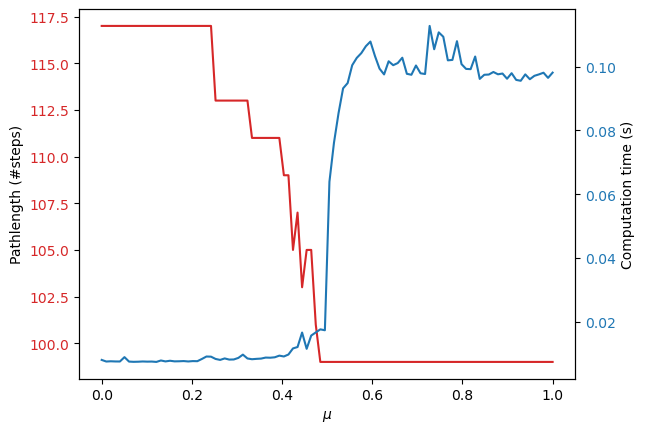

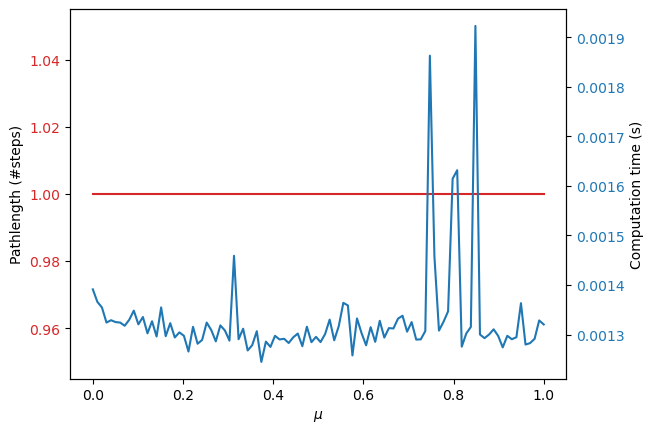

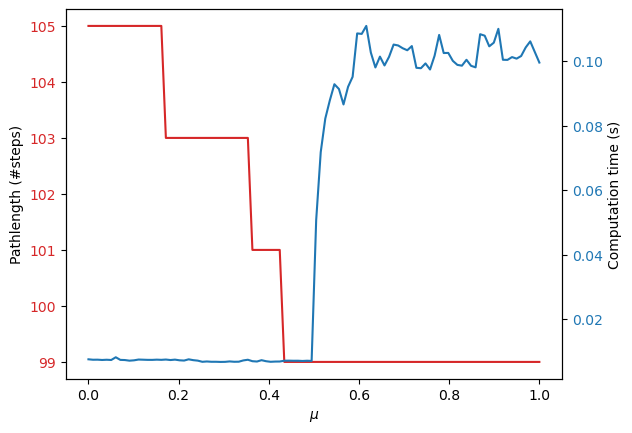

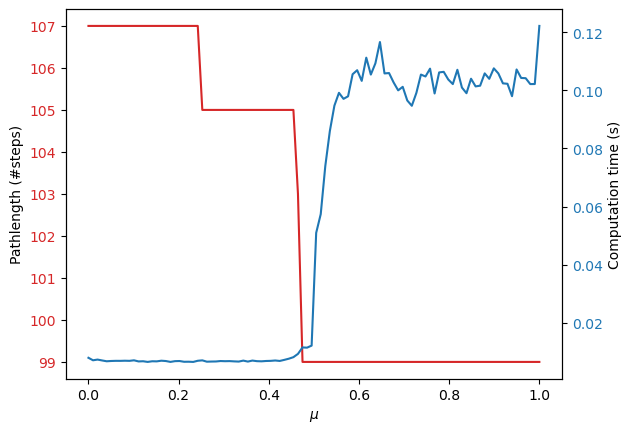

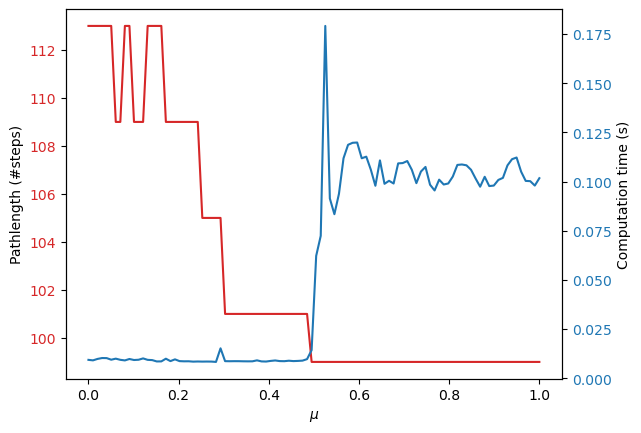

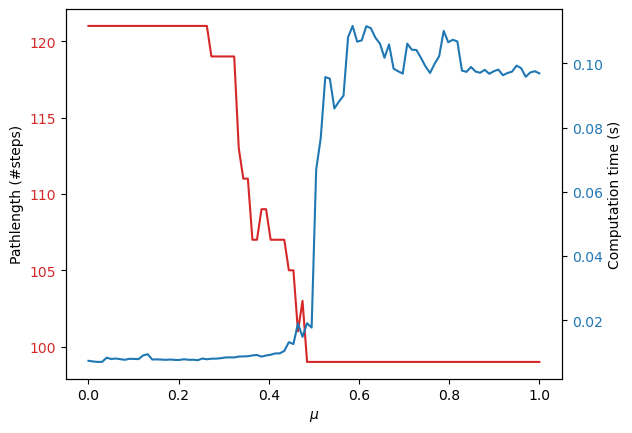

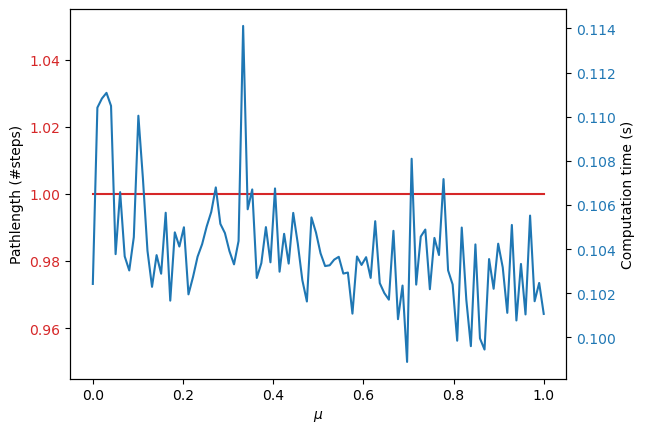

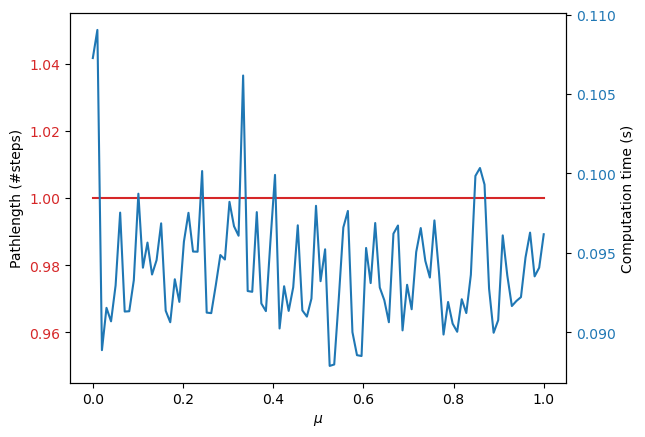

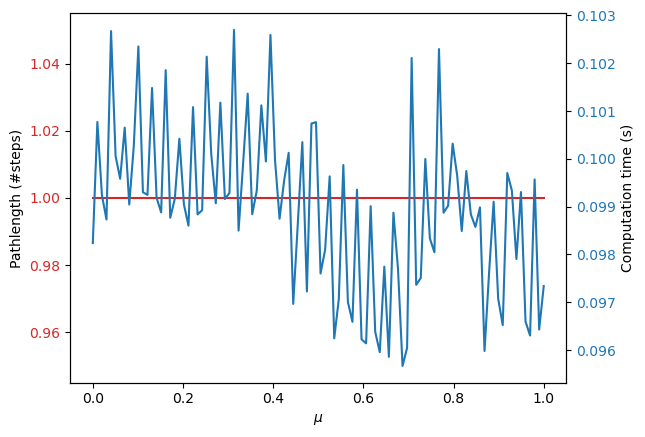

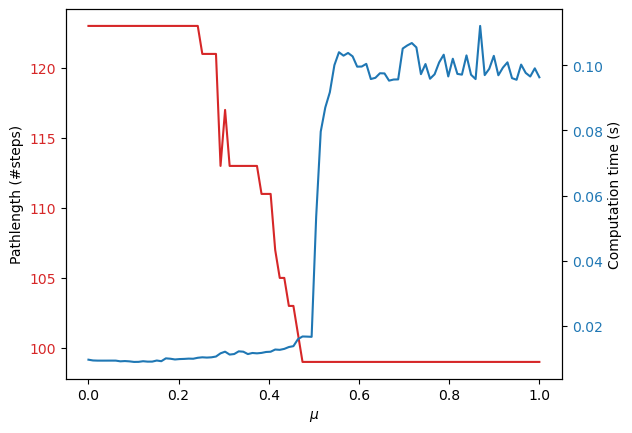

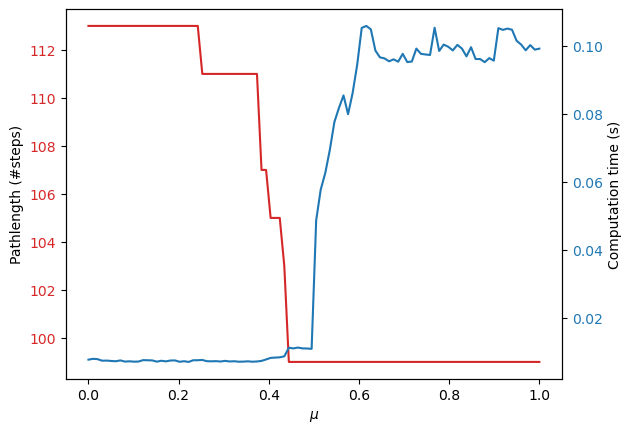

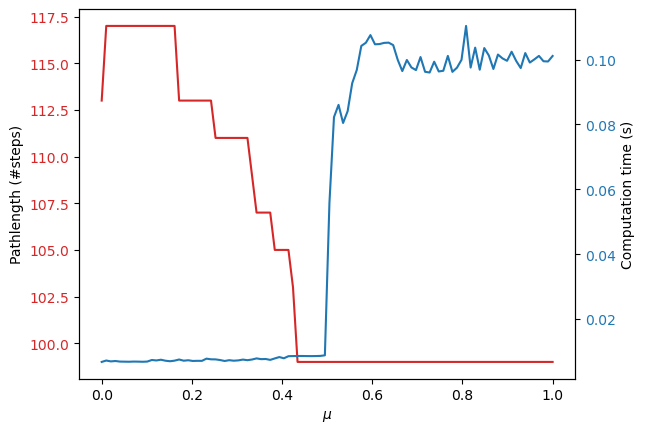

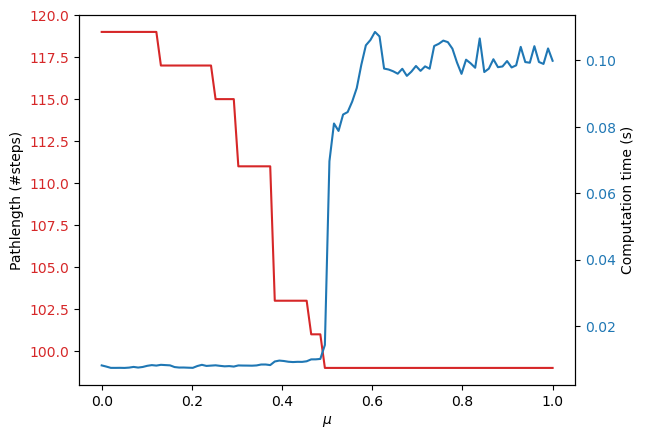

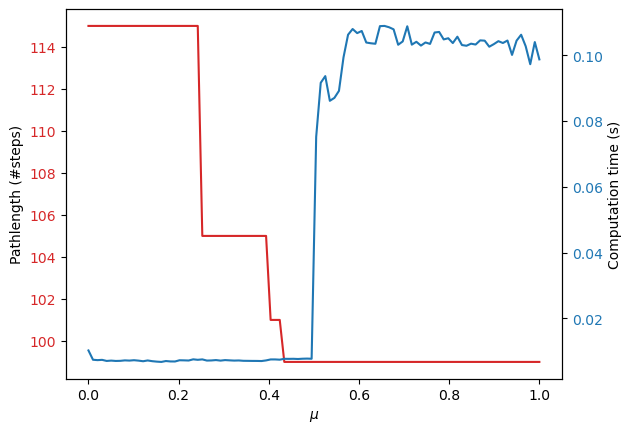

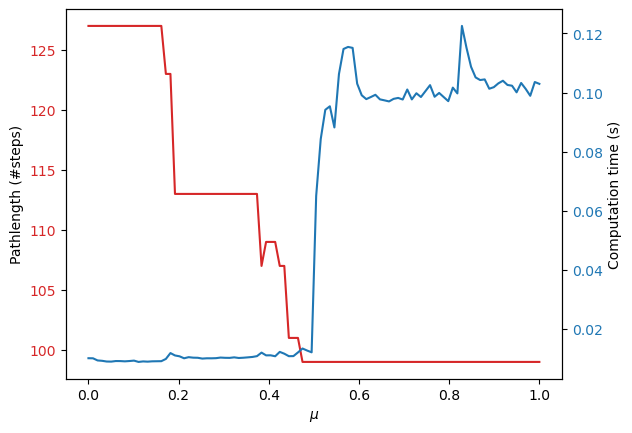

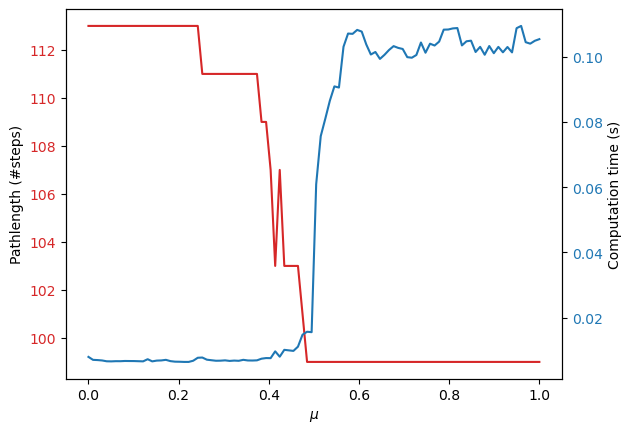

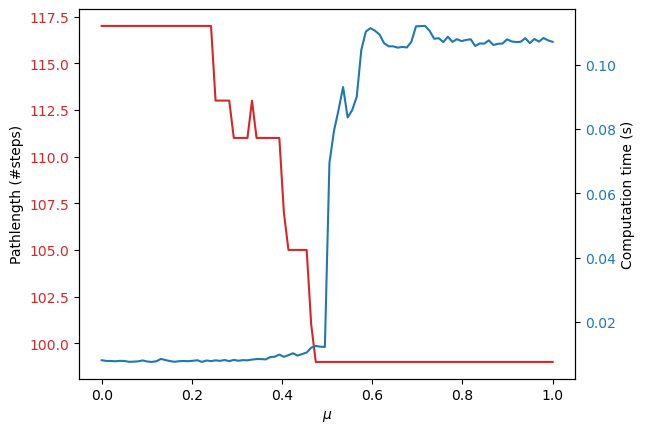

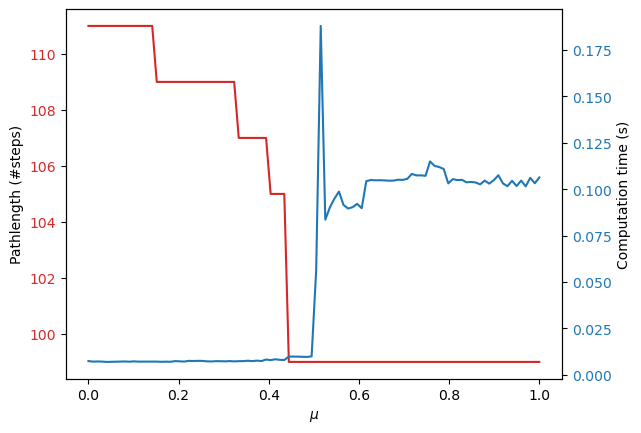

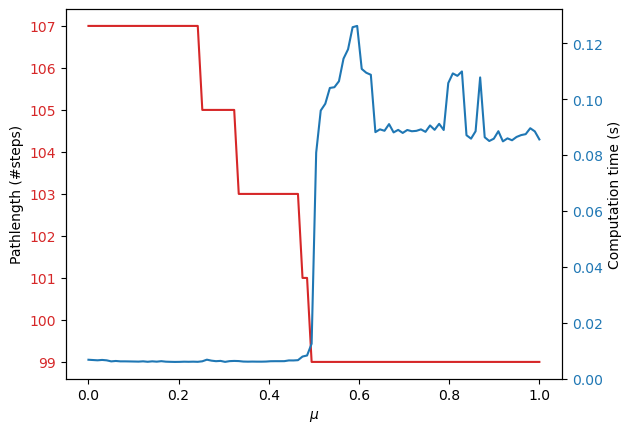

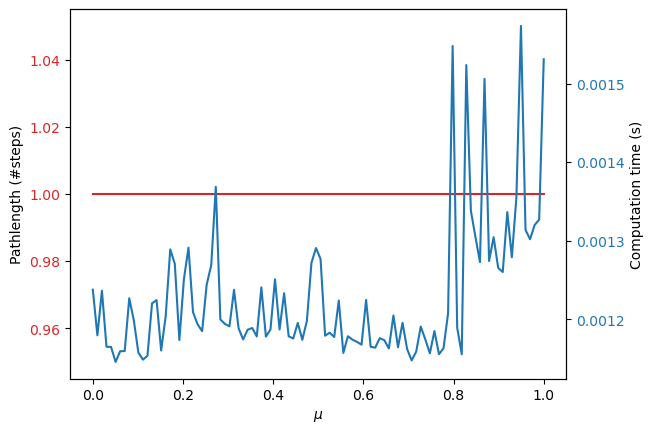

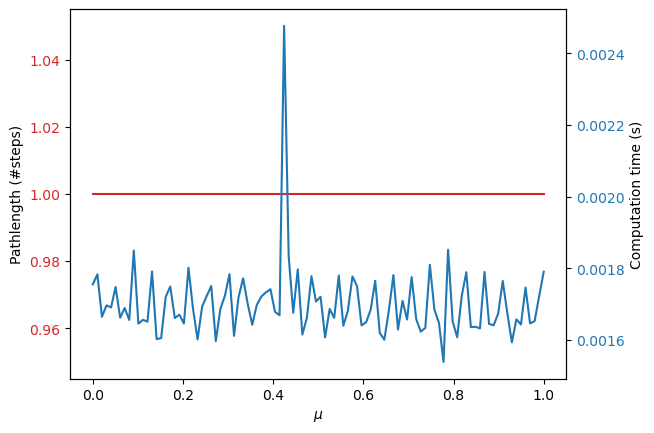

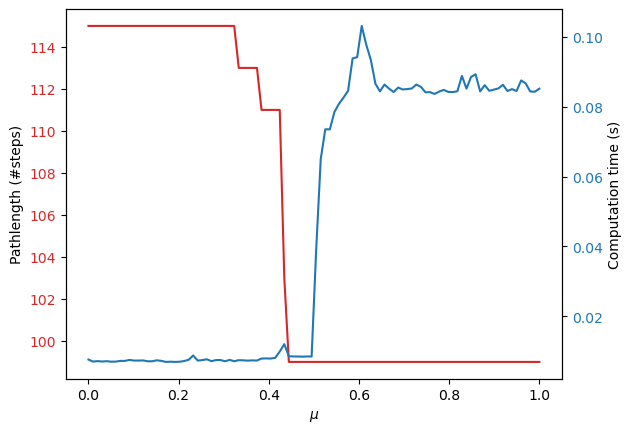

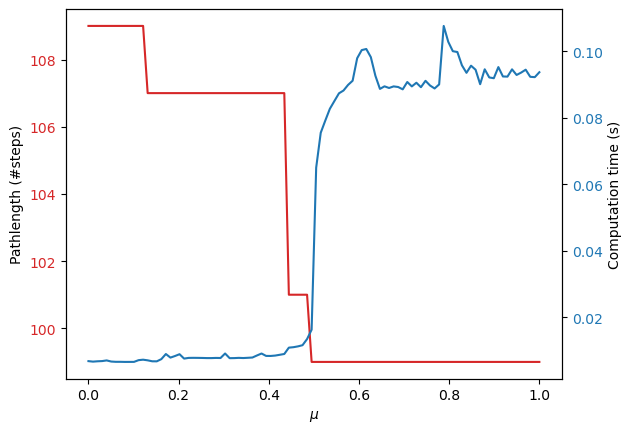

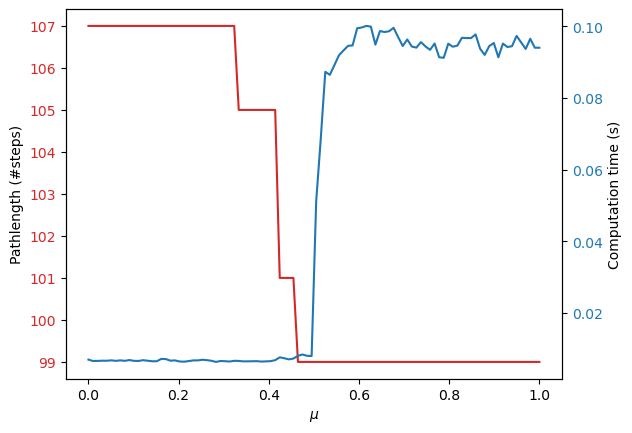

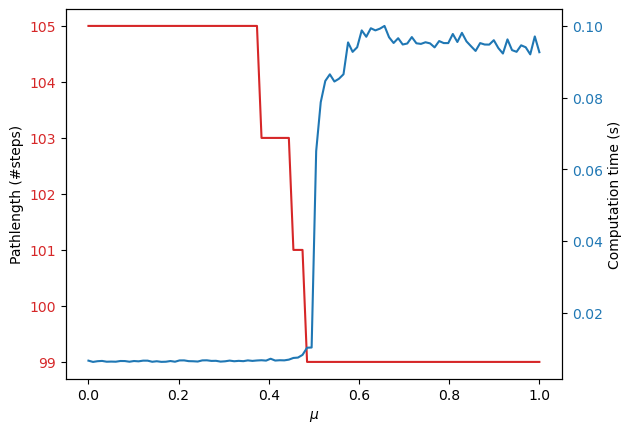

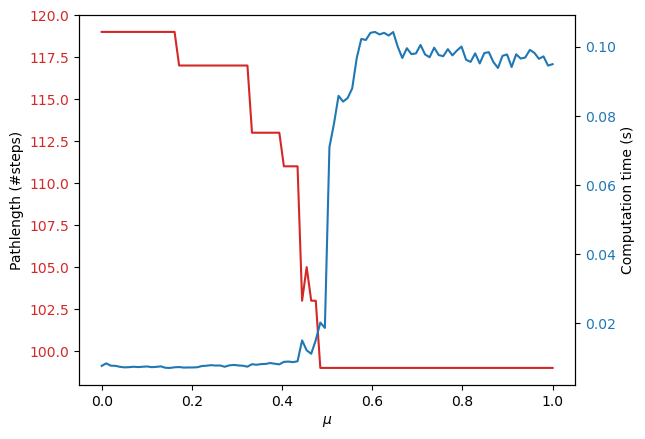

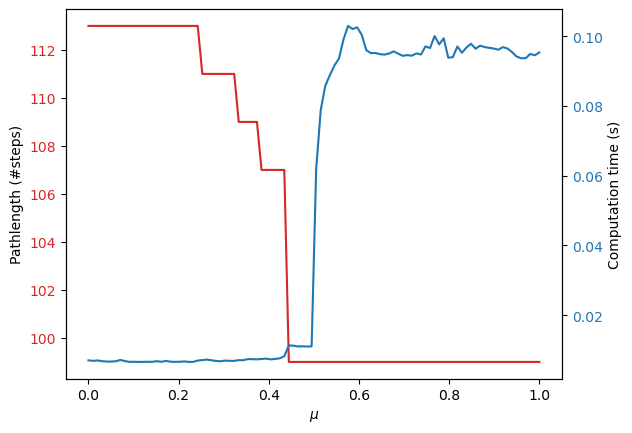

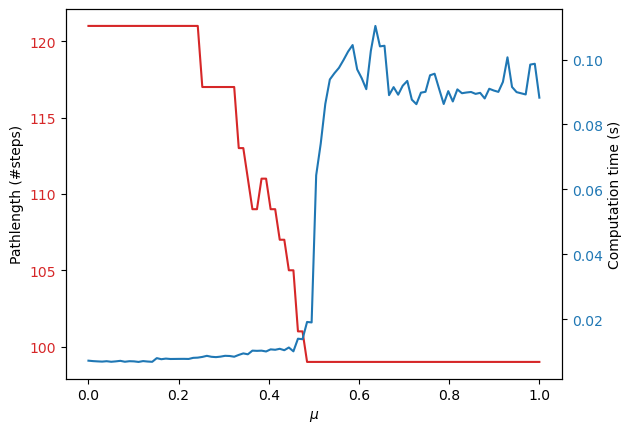

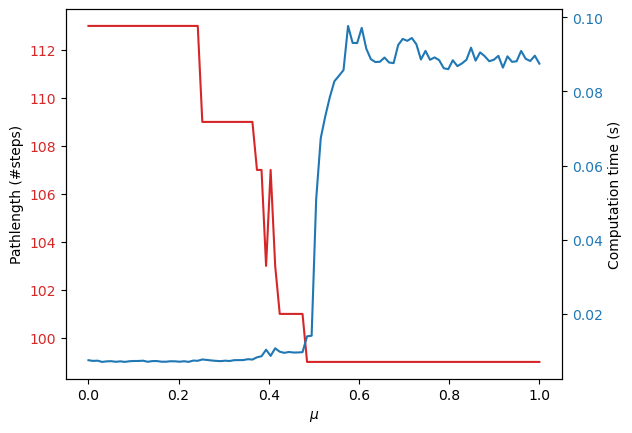

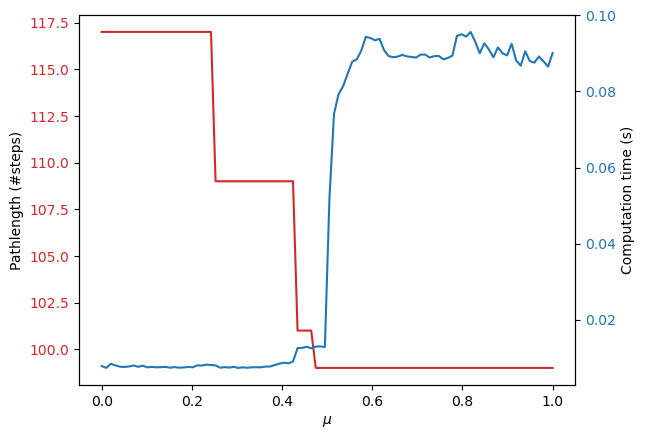

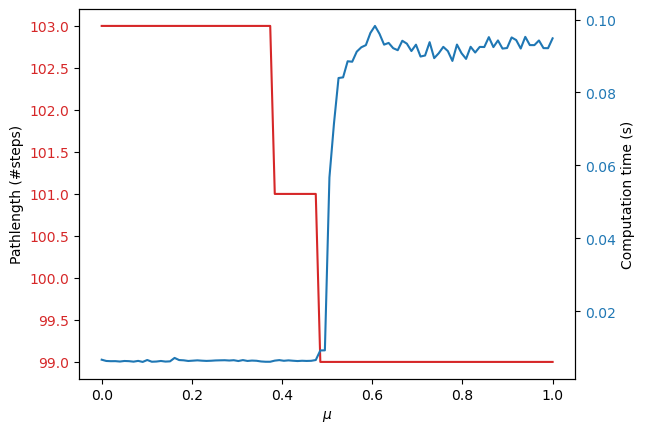

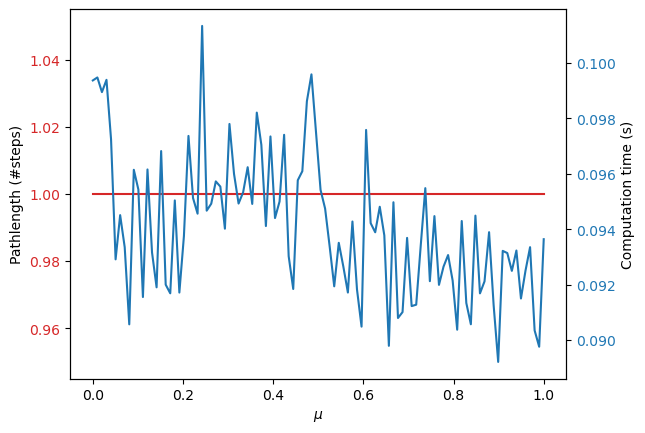

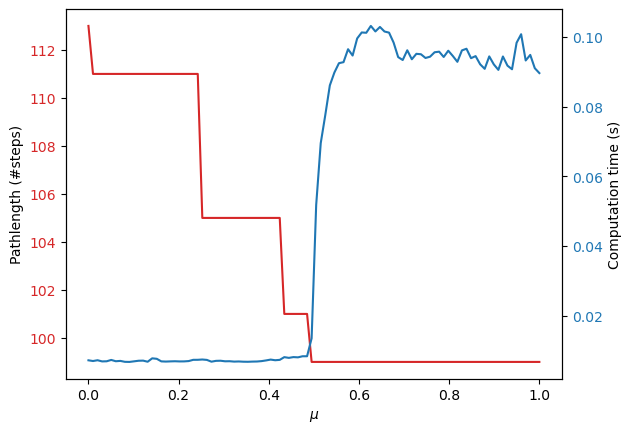

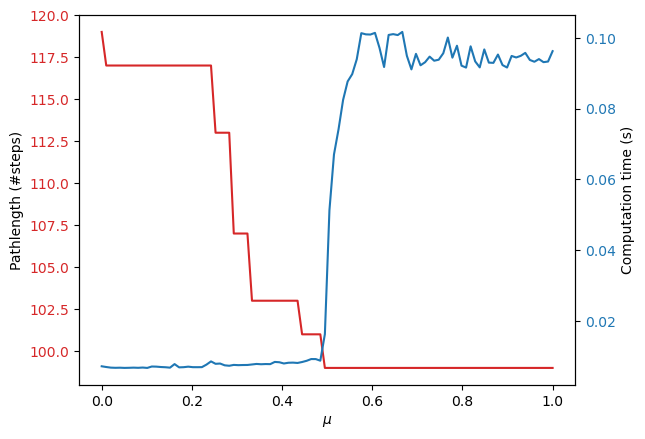

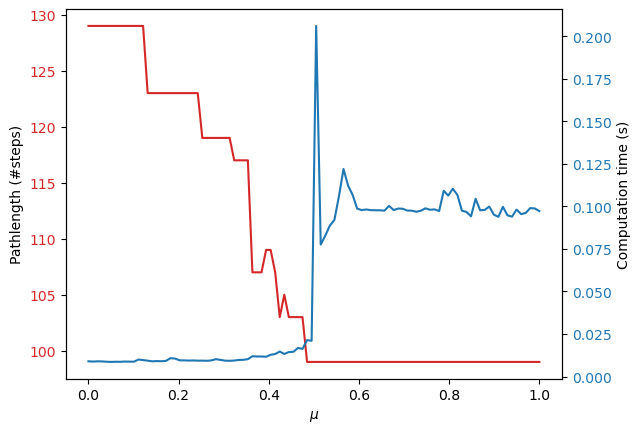

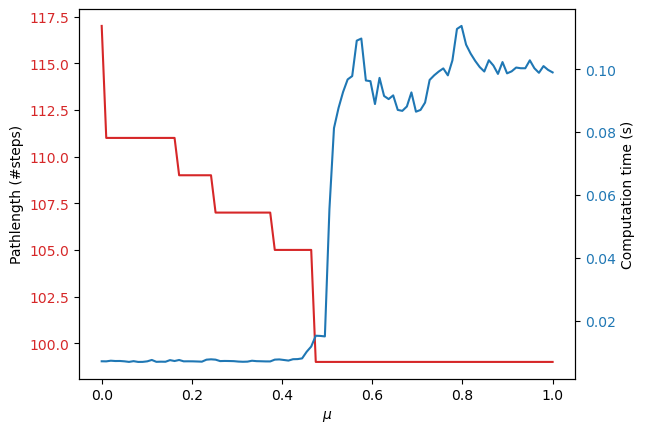

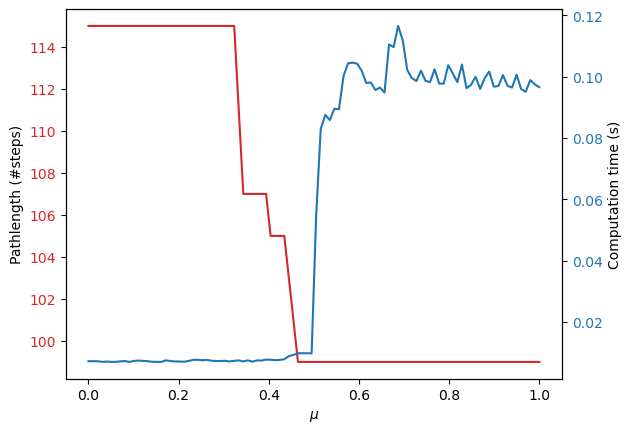

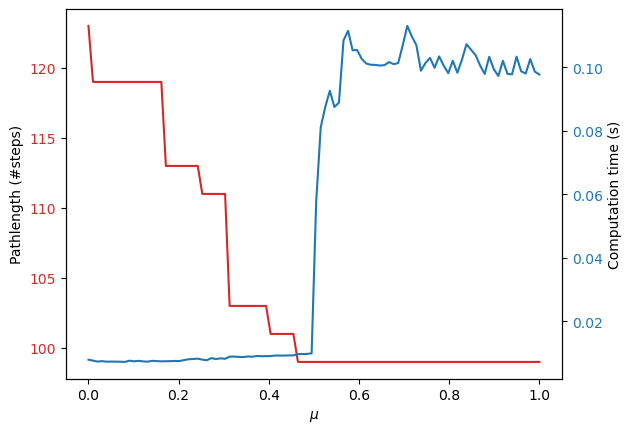

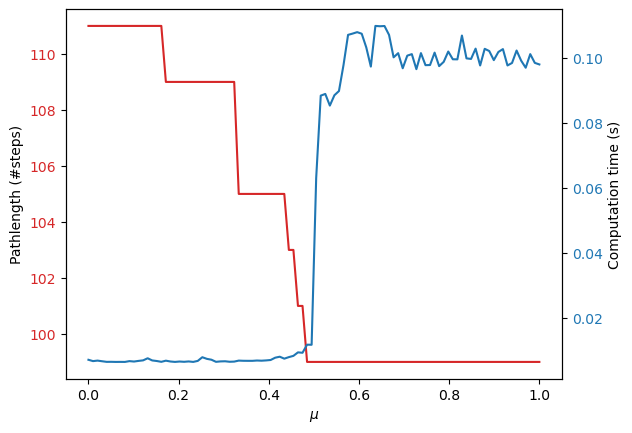

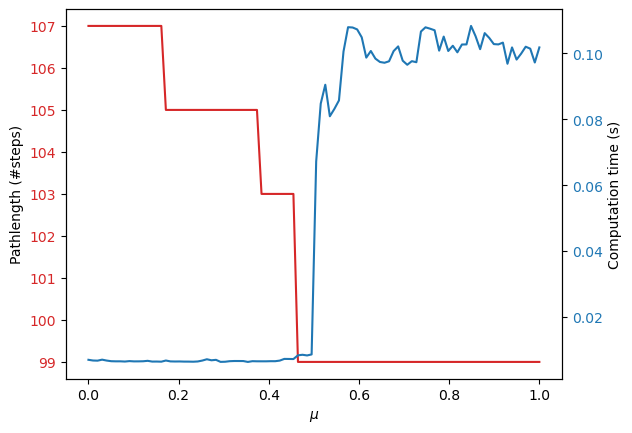

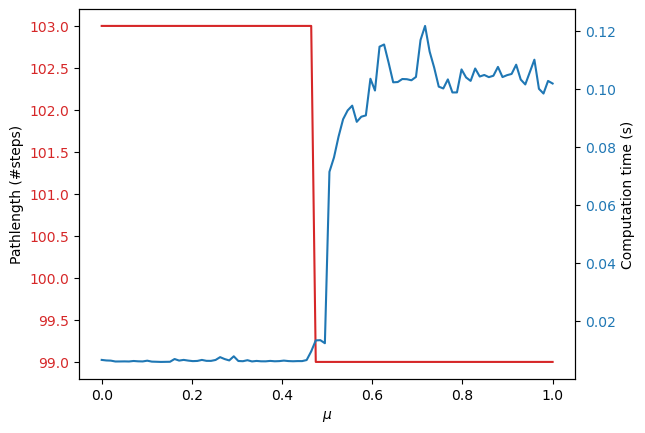

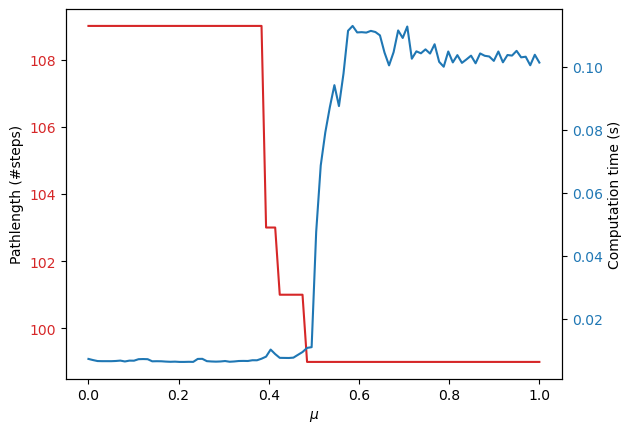

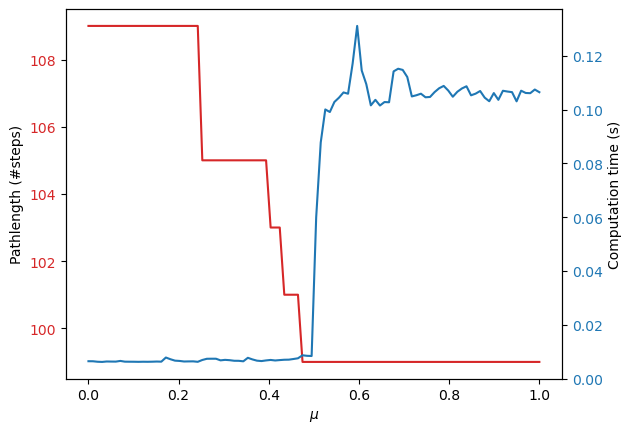

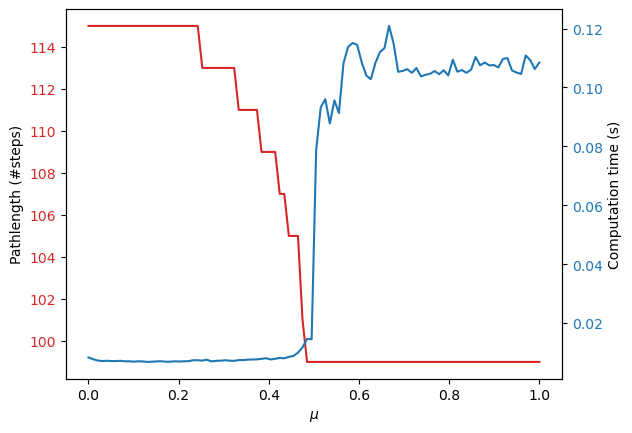

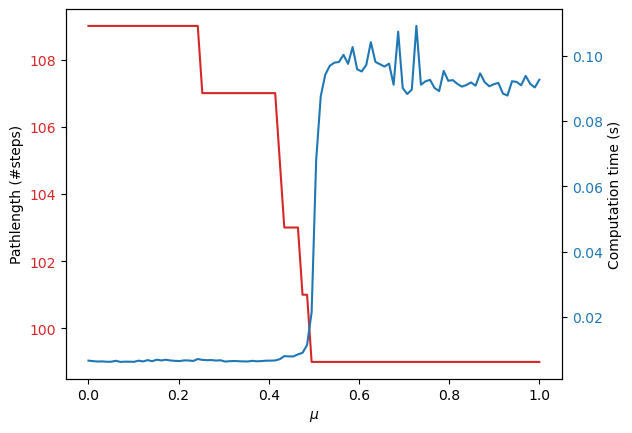

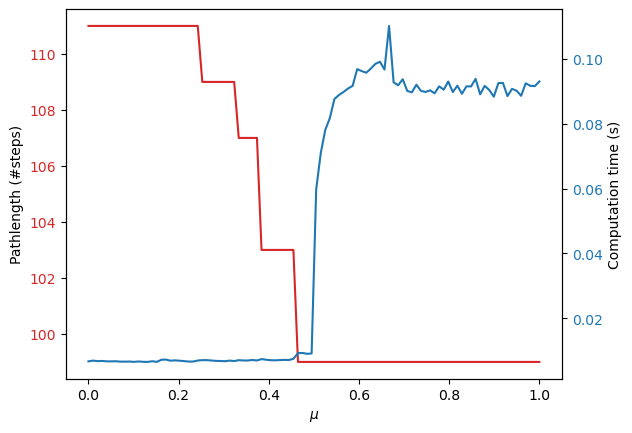

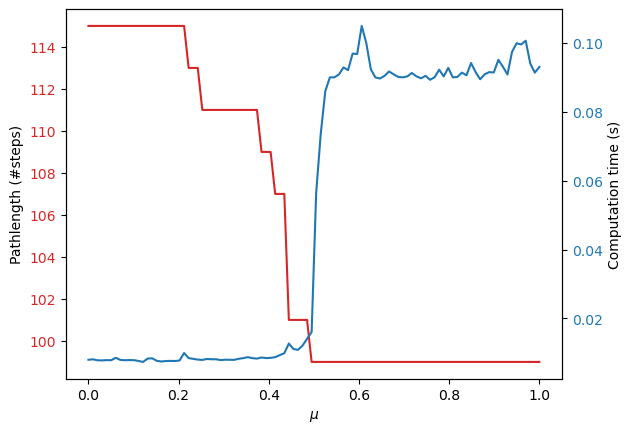

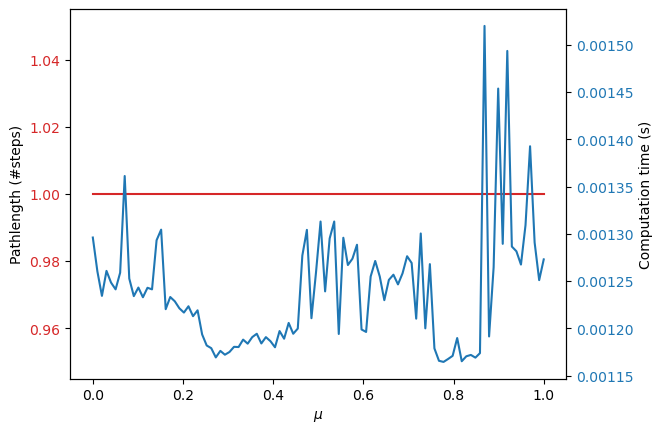

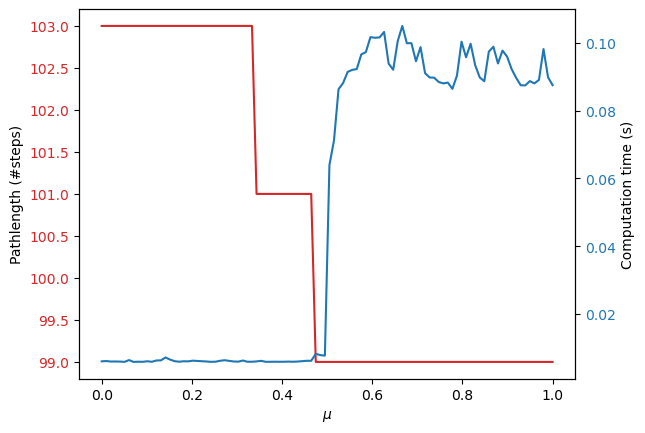

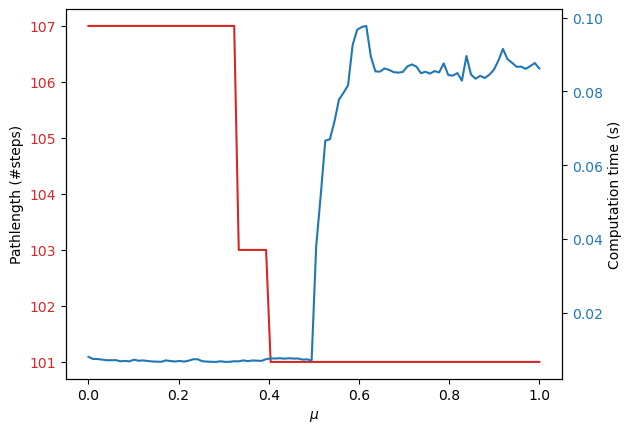

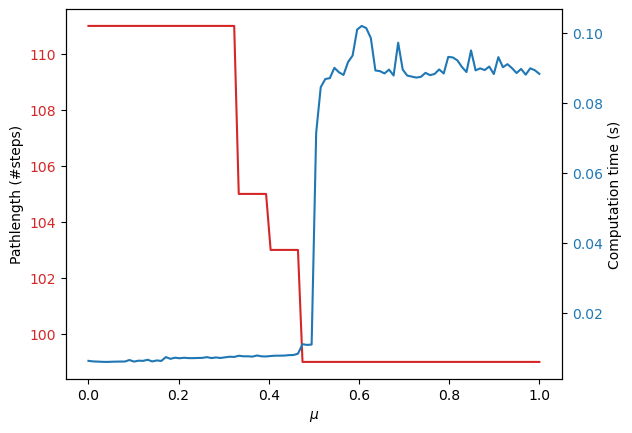

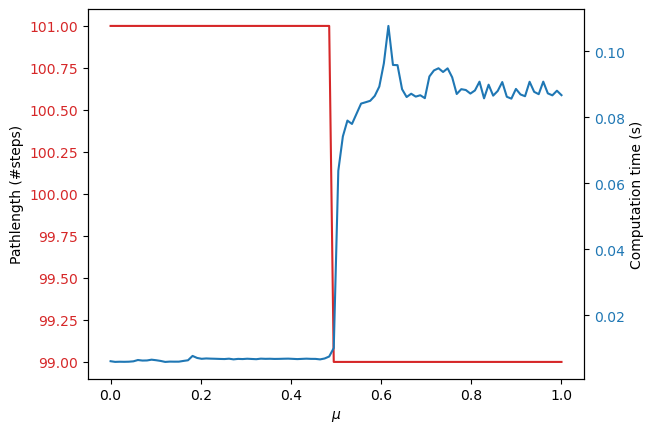

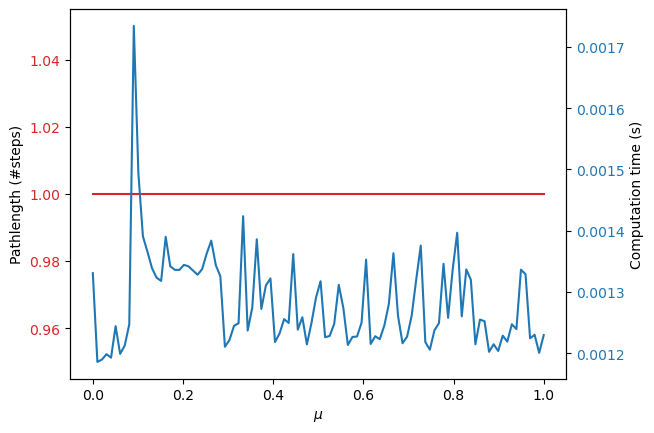

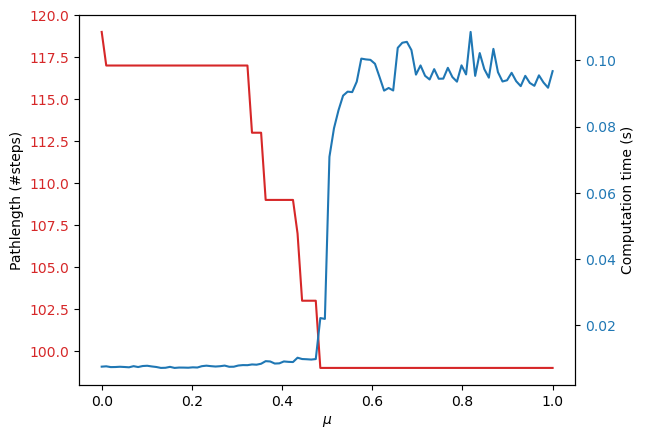

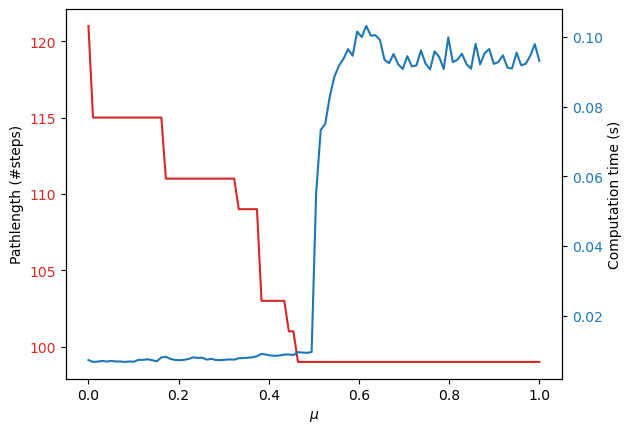

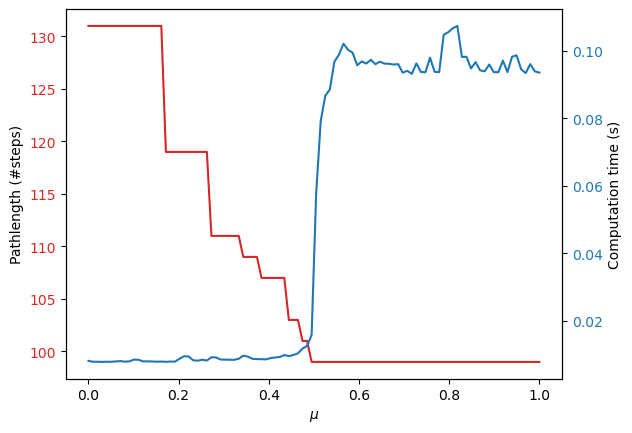

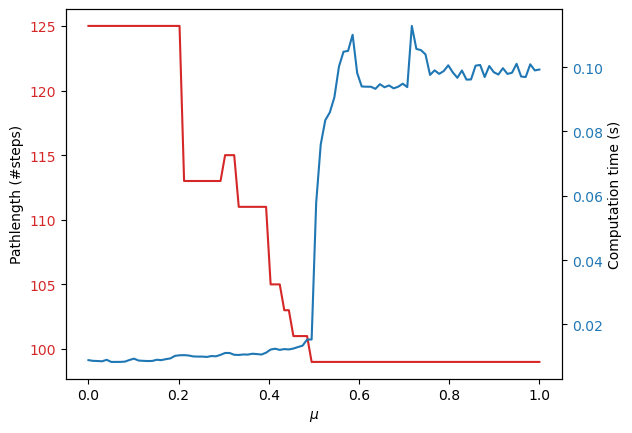

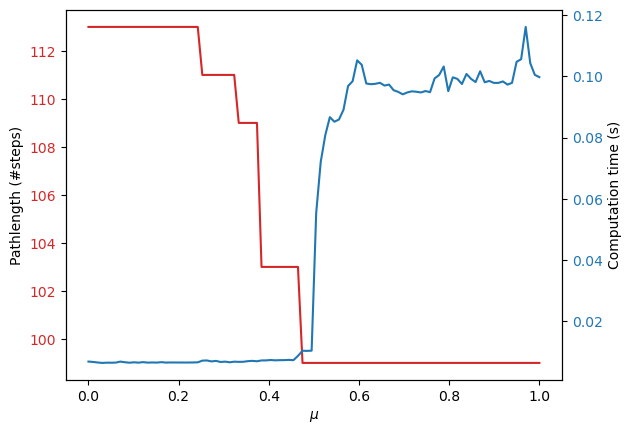

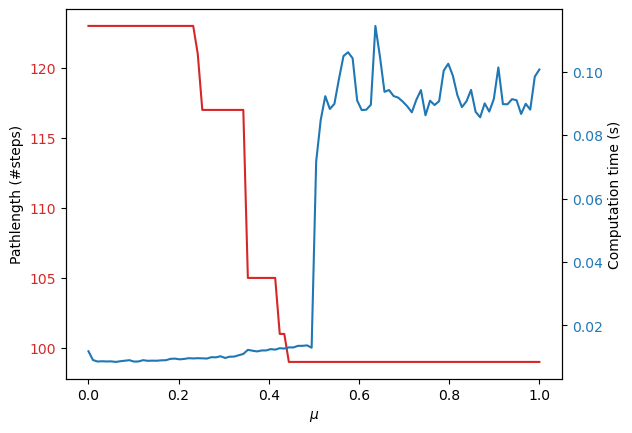

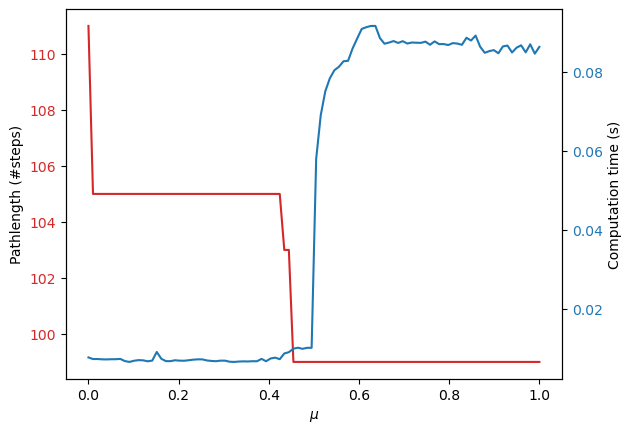

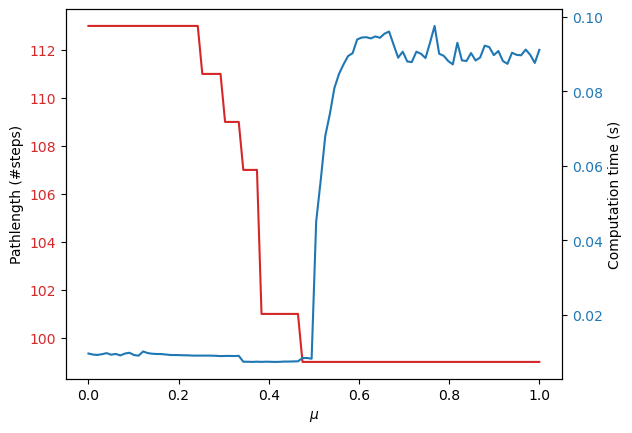

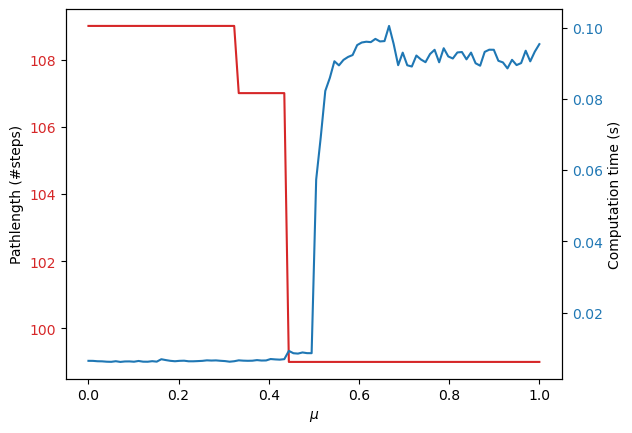

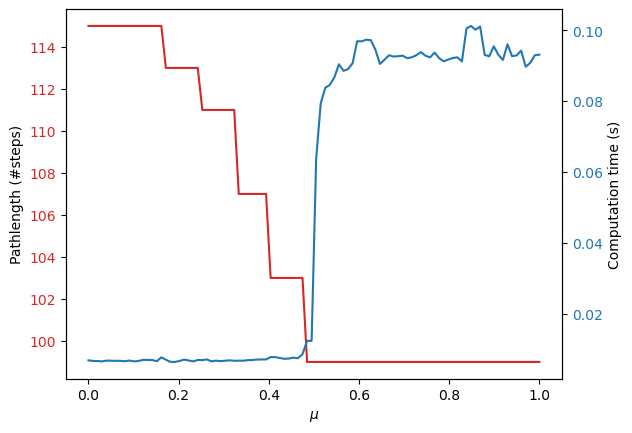

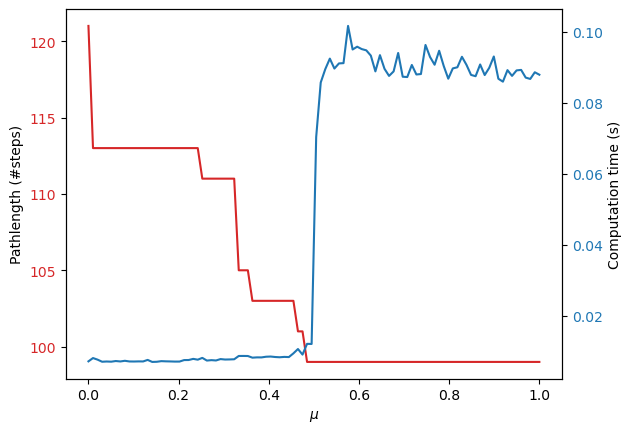

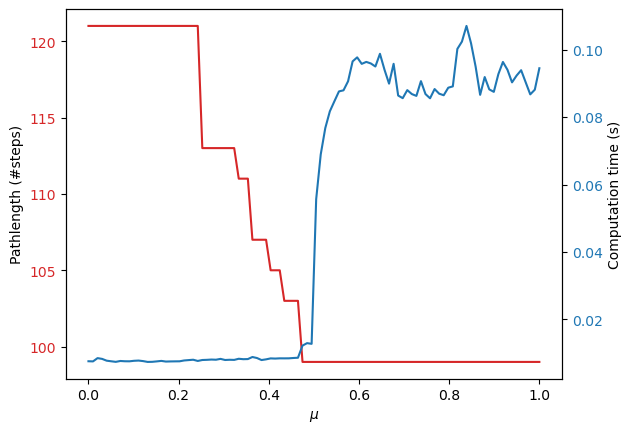

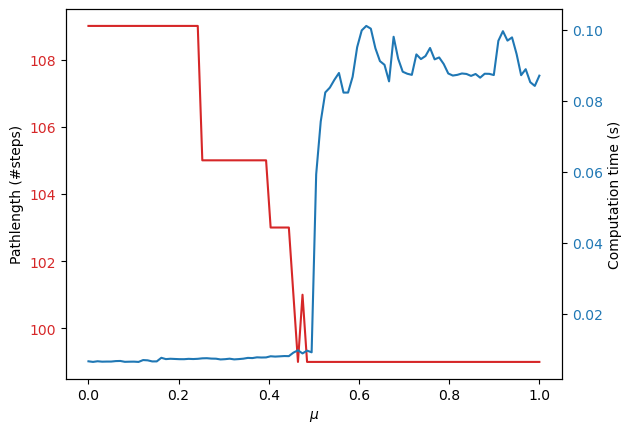

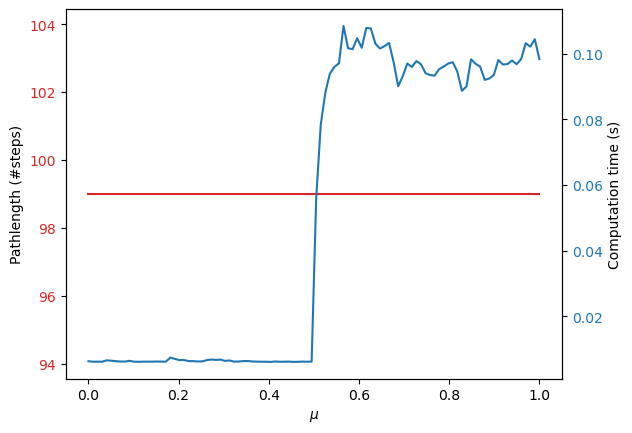

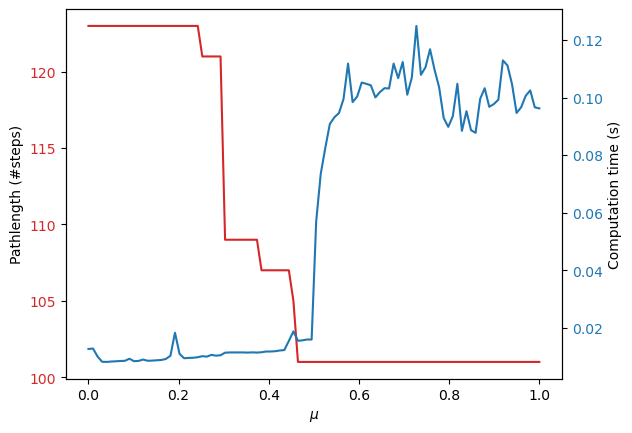

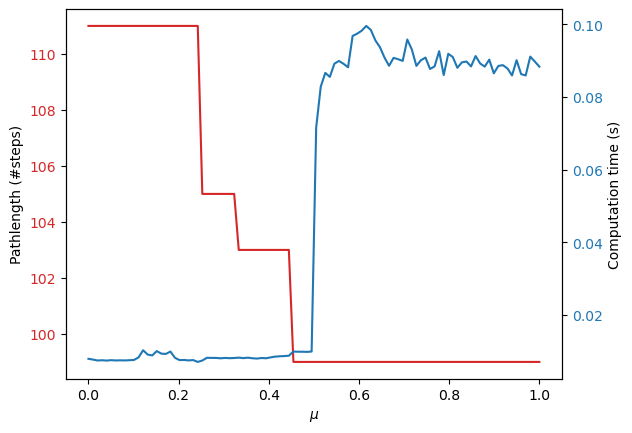

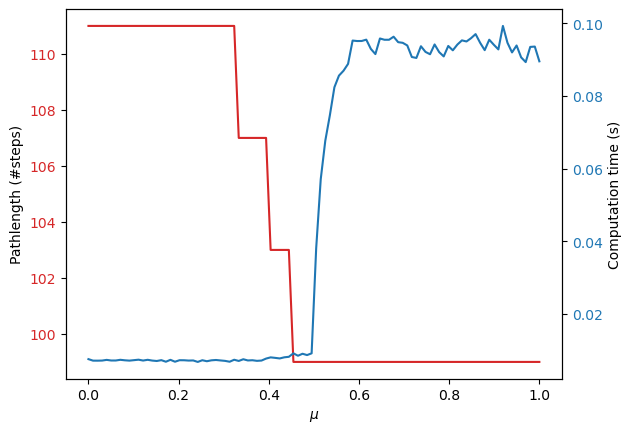

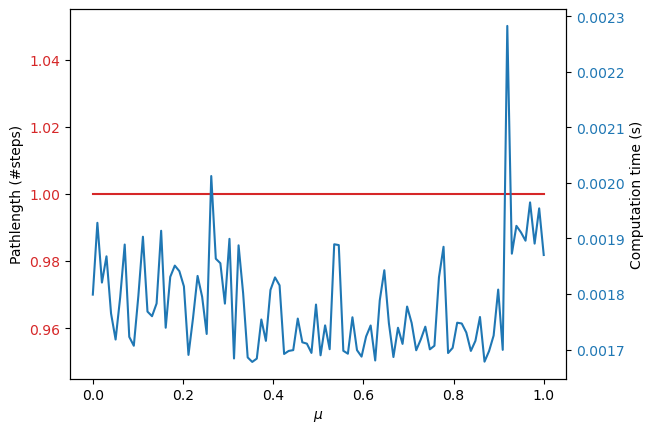

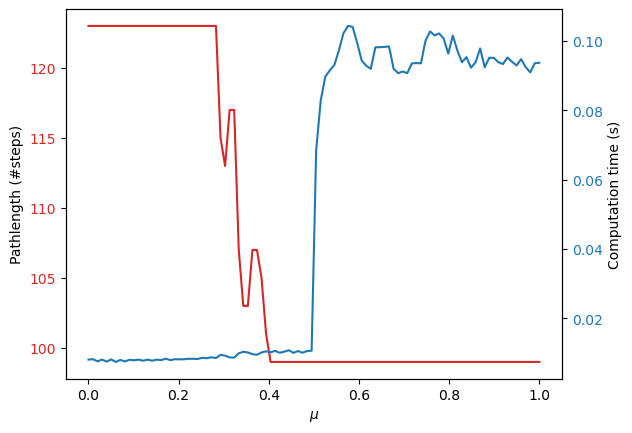

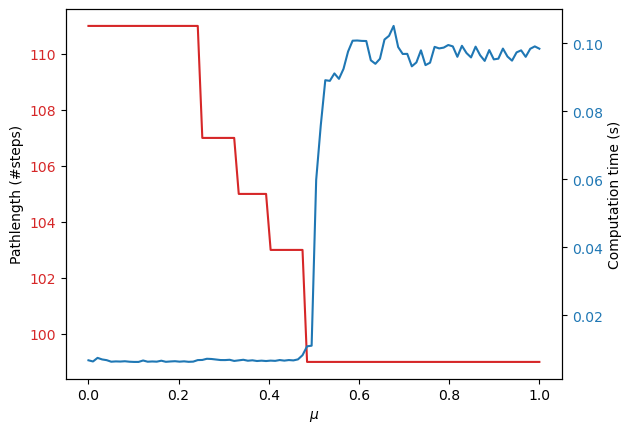

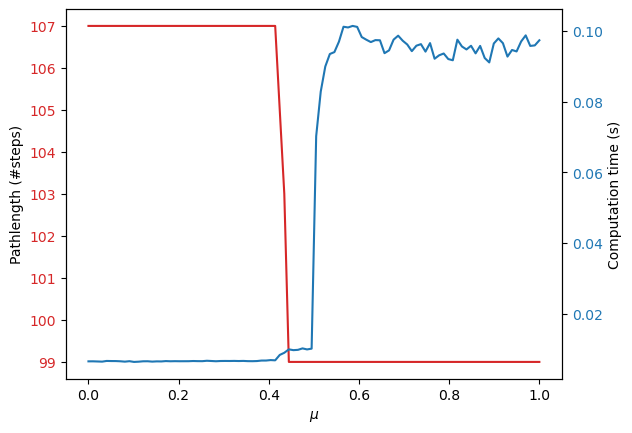

In [5]:



def mainloop(mu, n = n, m = m, start = start, end = end):
    
    endx,endy = end
    current = start # initialising current node to start
    checked = np.zeros((n,m)) # creating an array of checked nodes.
    gs = init_g()
    hs = init_h()
    fs = mu*gs + (1-mu)*hs
    frames = []

    for _ in range(n*m):
        if checked[endx,endy] == 0:
            cx, cy = current
            checked[cx,cy] = 1
            frame = maze + checked
            frames.append(frame)
            fs = updatef(gs,hs,maze,current,mu)
            next_node = least_cost(fs,gs,checked)
            if next_node != -1:
                current = next_node

            else:
                print("There is no path")
                break




    #reconstruct path
    path = []
    node = end
    while node in came_from:
        path.append(node)
        node = came_from[node]
    path.append(start)
    path.reverse()
    
    return path
    


pathlength = np.zeros((100,100))
mus = np.linspace(0,1,100)
times = np.zeros((100,100))

for j in range(100):
    maze = createmaze()



    for i in range(len(mus)):
        
        came_from = {}
        startTime = time.time()
        pathlength[i,j] = len(mainloop(mus[i]))
        endTime = time.time()
        times[i,j] = endTime - startTime

    
    #plotting computation time vs mu and pathlength vs mu on the same axes
    
    fig,ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel(r'$\mu$')
    ax1.set_ylabel("Pathlength (#steps)")
    ax1.plot(mus,pathlength[:,j], color = color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel("Computation time (s)")
    ax2.plot(mus,times[:,j], color = color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.savefig(f"iteration {j}.png")




In [8]:
#USED FOR TESTING
np.savetxt("times.csv", times, delimiter=',')
np.savetxt("pathlength.csv", pathlength, delimiter=',')


In [ ]:
#USED FOR TESTING
#mus = np.linspace(0,1,100)
#pathlength = np.genfromtxt('pathlength.csv', delimiter=',')
#times = np.genfromtxt('times.csv', delimiter=',')

In [6]:
#Removing cases where the shortest path wasn't found.
to_delete = []
for i in range(100):
    if pathlength[0,i] == 1:
        to_delete.append(i)

        
pathlength = np.delete(pathlength,to_delete,1)
times = np.delete(times,to_delete,1)
        
avgpath = np.zeros(100)
avgtime = np.zeros(100)
for i in range(100):
    avgpath[i] = np.mean(pathlength[i,:])
    avgtime[i] = np.mean(times[i,:])
    
    
    



[3, 23, 27, 32, 33, 34, 45, 46, 57, 73, 78, 96]


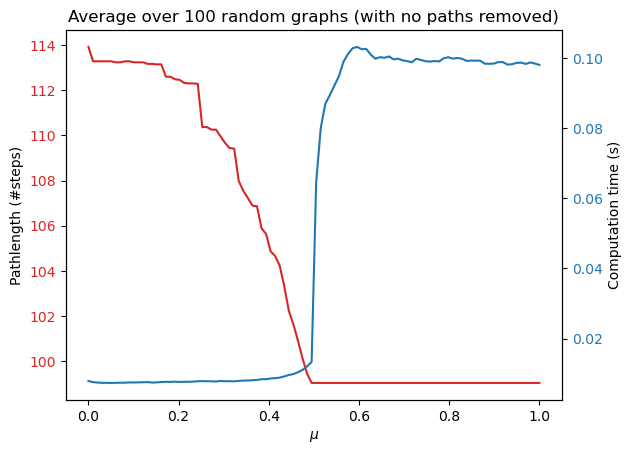

In [7]:
#plotting average computation time vs mu and average pathlength vs mu on the same axes

fig,ax1 = plt.subplots()
ax1.set_title("Average over 100 random graphs (with no paths removed)")
color = 'tab:red'
ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel("Pathlength (#steps)")
ax1.plot(mus,avgpath, color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel("Computation time (s)")
ax2.plot(mus,avgtime, color = color)
ax2.tick_params(axis='y', labelcolor=color)

plt.savefig("average.png")
